In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assessment
!ls WHR-2024-5CS037.csv

Mounted at /content/drive
/content/drive/MyDrive/Assessment
WHR-2024-5CS037.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Problem 1: Getting started with Data Exploration:
Dataset Overview:

In [ ]:
dataset = pd.read_csv('WHR-2024-5CS037.csv')
dataset.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
num_rows, num_columns = dataset.shape
print(f"Number of rows:{num_rows}")
print(f"Number of columns:{num_columns}")

Number of rows:143
Number of columns:9


In [ ]:
dtype_columns = list(zip(dataset.columns,dataset.dtypes))
display(dtype_columns)

[('Country name', dtype('O')),
 ('score', dtype('float64')),
 ('Log GDP per capita', dtype('float64')),
 ('Social support', dtype('float64')),
 ('Healthy life expectancy', dtype('float64')),
 ('Freedom to make life choices', dtype('float64')),
 ('Generosity', dtype('float64')),
 ('Perceptions of corruption', dtype('float64')),
 ('Dystopia + residual', dtype('float64'))]

In [ ]:
mean = dataset['score'].mean()
median = dataset['score'].median()
st_deviation = dataset['score'].std()
print(f"Mean:{mean}")
print(f"Median:{median}")
print(f"Standard deviation:",st_deviation)

Mean:5.52758041958042
Median:5.785
Standard deviation: 1.1707165099442995


In [ ]:
highest_score_country = dataset['Country name'][dataset['score'].idxmax()]
lowest_score_country = dataset['Country name'][dataset['score'].idxmin()]

print(f"Highest happiness score: {highest_score_country}")
print(f"Lowest happiness score: {lowest_score_country}")


Highest happiness score: Finland
Lowest happiness score: Afghanistan


In [ ]:
missings = dataset.isnull().sum()
display("The missing values in dataset:",missings)

'The missing values in dataset:'

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


In [ ]:
# Filtering and Sorting
# 1. Filter the dataset to show only the countries with a Score greater than 7.5
filtered_dataset = dataset[dataset['score'] > 7.5]
print("\nCountries with a Score greater than 7.5:")
print(filtered_dataset)


Countries with a Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [ ]:
# 2. Sort the filtered dataset by GDP per Capita in descending order
sorted_dataset = filtered_dataset.sort_values(by='Log GDP per capita', ascending=False)
print("Top 10 countries with Score > 7.5 sorted by GDP per Capita:")
display(sorted_dataset.head(10))


Top 10 countries with Score > 7.5 sorted by GDP per Capita:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [ ]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

# Apply the function to the 'score' column
dataset['Happiness Category'] = dataset['score'].apply(categorize_happiness)

# Display the updated dataset
display(dataset)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


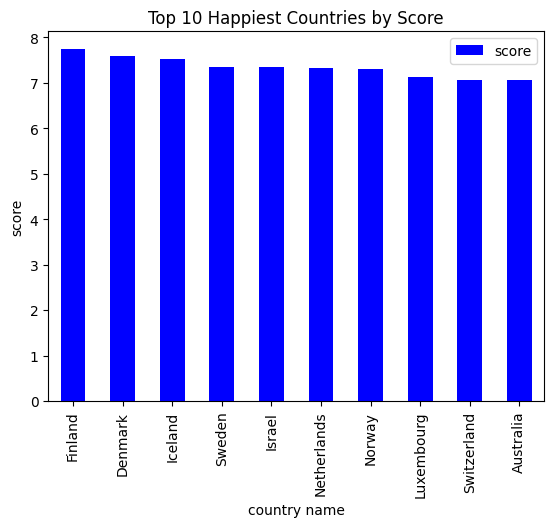

In [ ]:
happiest_countries = dataset.sort_values(by='score', ascending=False).head(10)
happiest_countries.plot(kind='bar', x='Country name', y='score', color = 'blue')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('country name')
plt.ylabel('score')
plt.show()

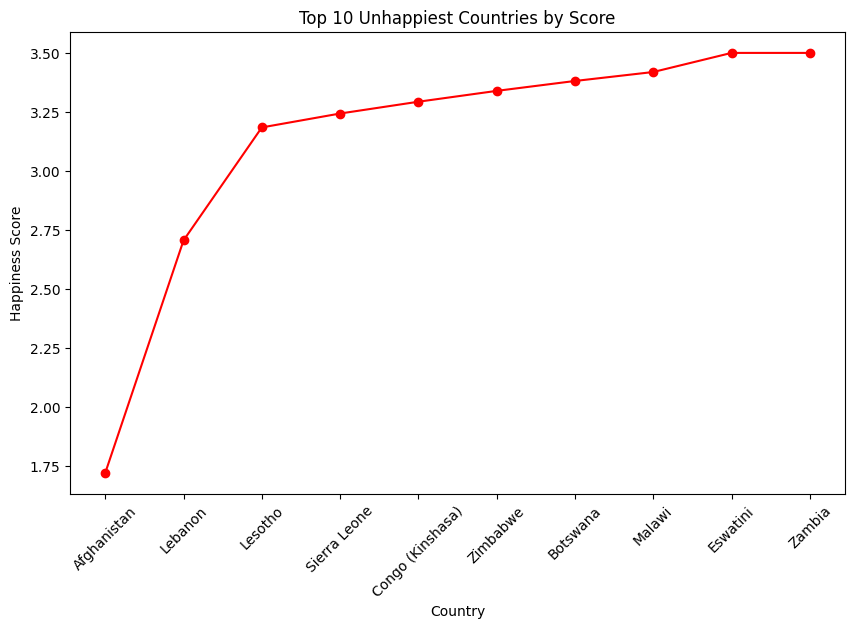

In [ ]:
# Line Plot: Top 10 unhappiest countries
unhappiest_countries = dataset.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o', linestyle='-', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

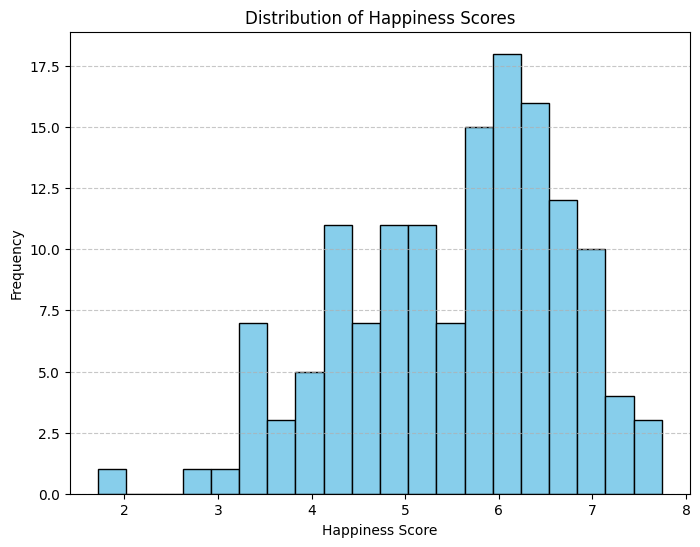

In [ ]:
# Histogram: Distribution of Happiness Scores
plt.figure(figsize=(8, 6))
plt.hist(dataset['score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

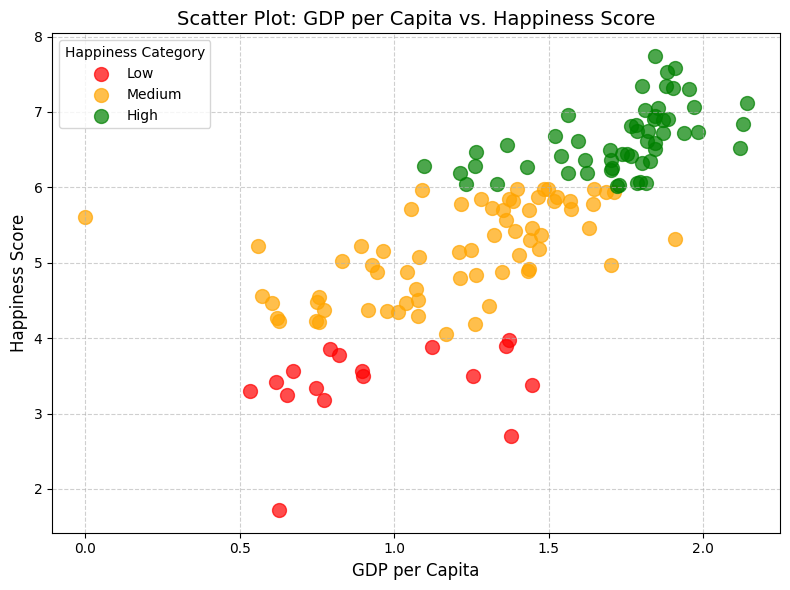

In [ ]:
# Scatter Plot: GDP per Capita vs. Happiness Score (Using Matplotlib)
plt.figure(figsize=(8, 6))
categories = {'Low': 'red', 'Medium': 'orange', 'High': 'green'}

for category, color in categories.items():
    subset = dataset[dataset['Happiness Category'] == category]
    plt.scatter(
        subset['Log GDP per capita'], subset['score'],
        label=category, color=color, s=100, alpha=0.7
    )

plt.title('Scatter Plot: GDP per Capita vs. Happiness Score', fontsize=14)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(title='Happiness Category', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##Problem- 2- Some Advance Data Exploration Task:

In [ ]:
# Task 1: Setup Task - Preparing the South-Asia Dataset
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

In [ ]:
# Filter the dataset for South Asian countries
south_asia_df = dataset[dataset['Country name'].isin(south_asian_countries)]
display(south_asia_df)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [ ]:
south_asia_csv_path = "south_asia_dataset.csv"
south_asia_df.to_csv(south_asia_csv_path, index=False)

In [ ]:
# Task 2: Composite Score Ranking
# 1. Create Composite Score
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

<ipython-input-20-bfe17bf599c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (


In [ ]:
# 2. Rank countries by Composite Score
top_composite = south_asia_df.sort_values(by='Composite Score', ascending=False)

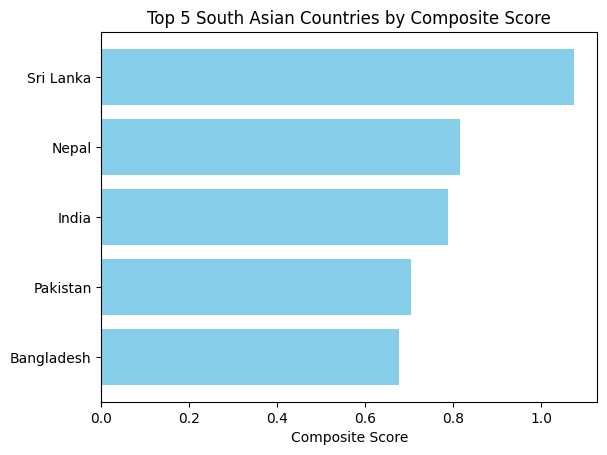

In [ ]:
# 3. Visualize top 5 countries
plt.barh(top_composite['Country name'].head(5), top_composite['Composite Score'].head(5), color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()
plt.show()

 4) Discuss whether the rankings based on the Composite Score align with the original Score- support your
 discussion with some visualization plot.

The rankings based on the Composite Score and the Original Score don't match closely. The Composite Score is shaped by factors like GDP, social support, and life expectancy, while the Original Score reflects how people feel about their well-being. Some countries with lower happiness scores still rank high on the Composite Score because they do well in areas like economy and health. However, happiness isn’t just about economic measures; it’s more about personal satisfaction.

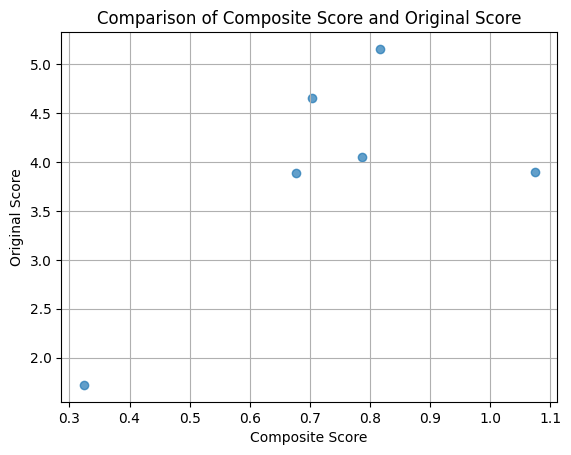

In [ ]:
# 4. Compare Composite Score with Original Score
plt.scatter(south_asia_df['Composite Score'], south_asia_df['score'], alpha=0.7)
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.title('Comparison of Composite Score and Original Score')
plt.grid(True)
plt.show()

In [ ]:
# Task 3: Outlier Detection
# 1. Identify outliers using 1.5 * IQR rule
Q1 = south_asia_df[['score', 'Log GDP per capita']].quantile(0.25)
Q3 = south_asia_df[['score', 'Log GDP per capita']].quantile(0.75)
IQR = Q3 - Q1

outliers = south_asia_df[
    (south_asia_df['score'] < (Q1['score'] - 1.5 * IQR['score'])) |
    (south_asia_df['score'] > (Q3['score'] + 1.5 * IQR['score'])) |
    (south_asia_df['Log GDP per capita'] < (Q1['Log GDP per capita'] - 1.5 * IQR['Log GDP per capita'])) |
    (south_asia_df['Log GDP per capita'] > (Q3['Log GDP per capita'] + 1.5 * IQR['Log GDP per capita']))
]


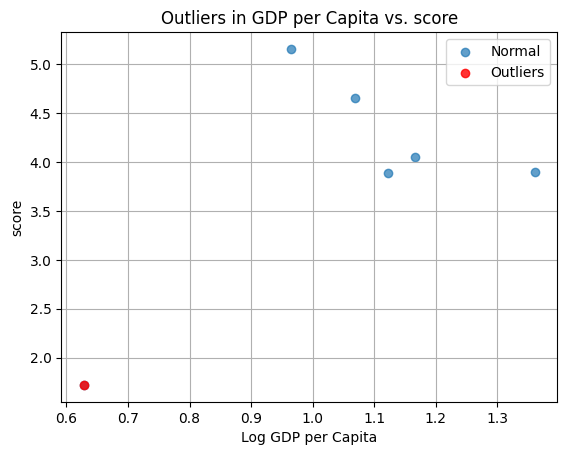

In [ ]:
# 3. Scatter plot highlighting outliers
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Normal', alpha=0.7)
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers', alpha=0.8)
plt.xlabel('Log GDP per Capita')
plt.ylabel('score')
plt.title('Outliers in GDP per Capita vs. score')
plt.legend()
plt.grid(True)
plt.show()

3) Identify and discuss the strongest and weakest relationships between these metrics and the Score for
 South Asian countries.

A country with high GDP but low happiness can raise the average GDP while lowering the average happiness score, and the opposite can also happen. These extreme cases might not reflect the true situation of the countries, making the analysis less accurate. Identifying outliers helps ensure a more precise and unbiased understanding of the data.

Strongest Relationship: The strongest link is between Generosity and Score (0.87), showing that countries where people are more generous tend to be happier overall.

Weakest Relationship: While Freedom to Make Life Choices also has a strong relationship with Score (0.80), it is slightly weaker than Generosity.

In conclusion, people tend to feel happier when others around them show kindness and helpfulness.

In [ ]:
# Task 4: Exploring Trends Across Metrics
# 1. Correlation with Score
correlation_freedom = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
correlation_generosity = south_asia_df['Generosity'].corr(south_asia_df['score'])
print(f"Correlation - Freedom to Make Life Choices: {correlation_freedom}")
print(f"Correlation - Generosity: {correlation_generosity}")

Correlation - Freedom to Make Life Choices: 0.8005185224163315
Correlation - Generosity: 0.874512371253192


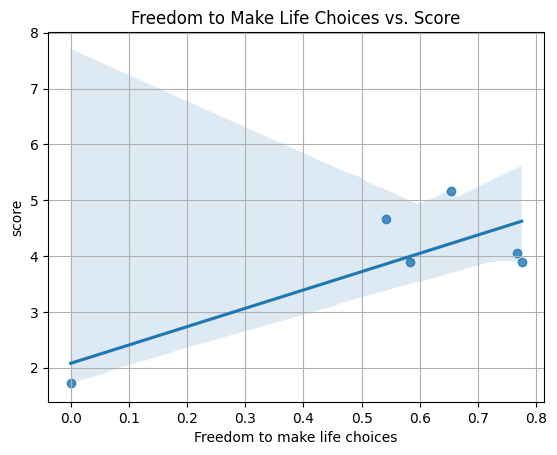

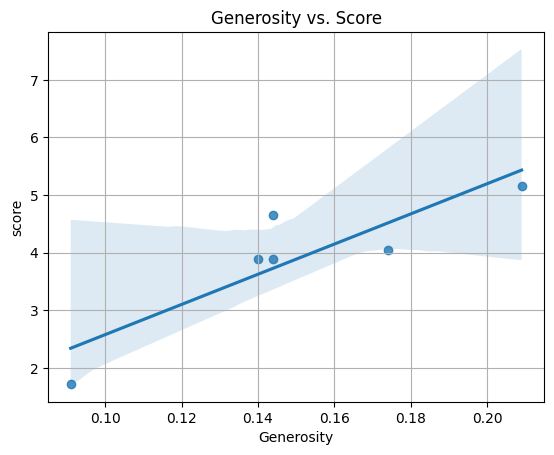

In [ ]:
# 2. Scatter plots with trendlines
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df)
plt.title('Freedom to Make Life Choices vs. Score')
plt.grid(True)
plt.show()

sns.regplot(x='Generosity', y='score', data=south_asia_df)
plt.title('Generosity vs. Score')
plt.grid(True)
plt.show()

In [ ]:
# Task 5: Gap Analysis
# 1. Calculate GDP-Score Gap
south_asia_df = south_asia_df.copy()
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


In [ ]:
# 2. Rank countries by Gap
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap')
display(ascending_gap)
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)
display(descending_gap)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193


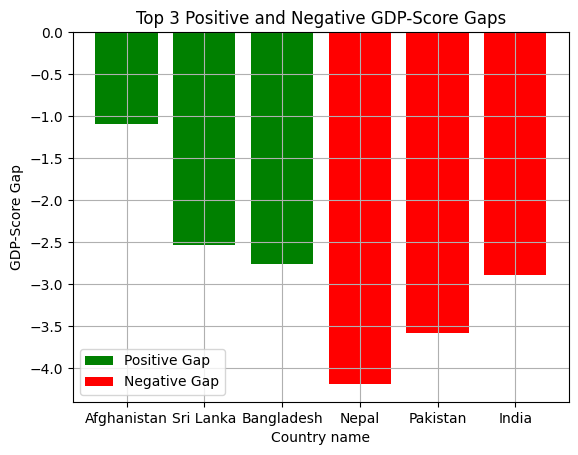

In [ ]:
# 3. Visualize Top 3 Positive and Negative Gaps
top_3_positive = descending_gap.head(3)
top_3_negative = ascending_gap.head(3)

plt.bar(top_3_positive['Country name'], top_3_positive['GDP-Score Gap'], color='green', label='Positive Gap')
plt.bar(top_3_negative['Country name'], top_3_negative['GDP-Score Gap'], color='red', label='Negative Gap')
plt.xlabel('Country name')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.legend()
plt.grid(True)
plt.show()


4) Analyze the reasons behind these gaps and their implications for South Asian countries.

##Reasons:

Economic inequality and uneven wealth distribution within the same country.

Issues like corruption, poor public services, and unemployment lower happiness levels.

A lack of quality education, healthcare, and overall living conditions affects happiness.

Resources are not being used efficiently.
Limited knowledge about trade and commerce.

##Implications:

Reducing inequality and challenging outdated social or traditional beliefs.

Encouraging balanced development in both rural and urban areas.

Investing in sectors like healthcare, education, and employment.

Promoting empathy and transparency among citizens.

Maximizing resource use with modern tools and technologies, improving trade practices with proper marketing strategies.


In [ ]:
# Problem 3: Comparative Analysis
# Task 1: Prepare Middle Eastern Dataset
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
middle_east_df = dataset[dataset['Country name'].isin(middle_east_countries)].copy()

In [ ]:
# 1. Descriptive Statistics
sa_mean_score = south_asia_df['score'].mean()
me_mean_score = middle_east_df['score'].mean()
sa_std_score = south_asia_df['score'].std()
me_std_score = middle_east_df['score'].std()
print(f"South Asia - Mean Score: {sa_mean_score}, Standard Deviation: {sa_std_score}")
print(f"Middle East - Mean Score: {me_mean_score}, Standard Deviation: {me_std_score}")

if sa_mean_score > me_mean_score:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")

South Asia - Mean Score: 3.895666666666667, Standard Deviation: 1.1770690152521504
Middle East - Mean Score: 5.412100000000001, Standard Deviation: 1.5662011684327144
Middle East has higher happiness scores on average.


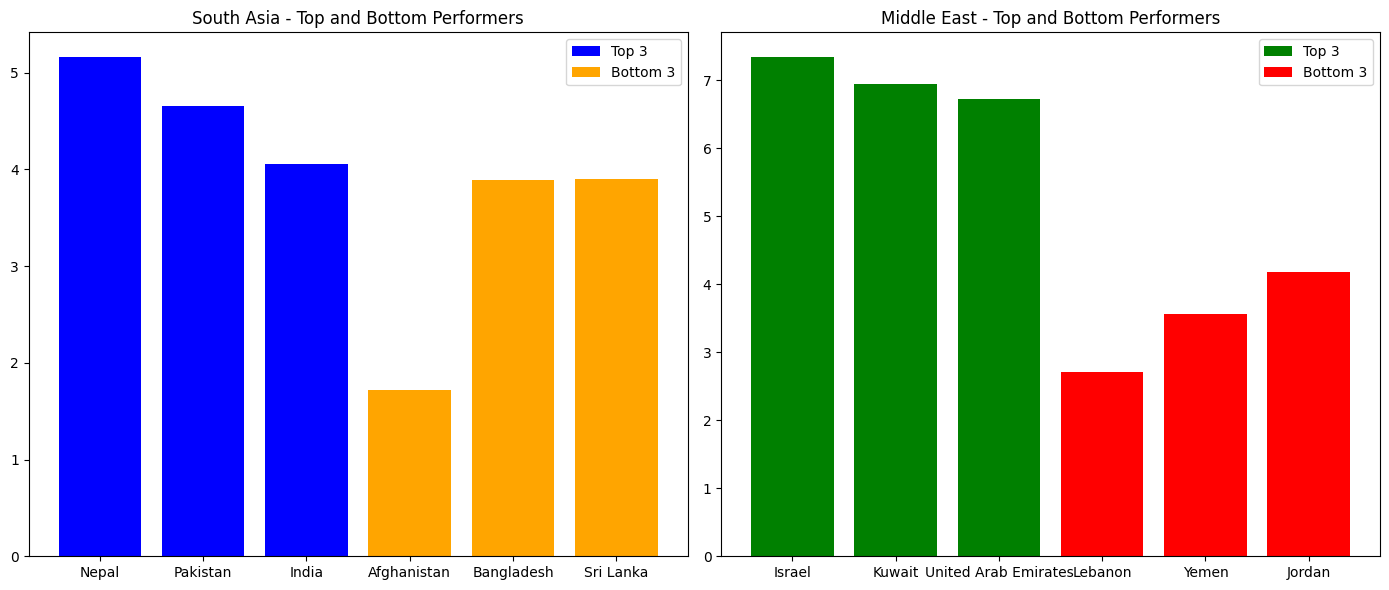

In [ ]:
# 2. Top and Bottom Performers
sa_top3 = south_asia_df.sort_values(by='score', ascending=False).head(3)
sa_bottom3 = south_asia_df.sort_values(by='score', ascending=True).head(3)
me_top3 = middle_east_df.sort_values(by='score', ascending=False).head(3)
me_bottom3 = middle_east_df.sort_values(by='score', ascending=True).head(3)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].bar(sa_top3['Country name'], sa_top3['score'], color='blue', label='Top 3')
axes[0].bar(sa_bottom3['Country name'], sa_bottom3['score'], color='orange', label='Bottom 3')
axes[0].set_title('South Asia - Top and Bottom Performers')
axes[0].legend()

axes[1].bar(me_top3['Country name'], me_top3['score'], color='green', label='Top 3')
axes[1].bar(me_bottom3['Country name'], me_bottom3['score'], color='red', label='Bottom 3')
axes[1].set_title('Middle East - Top and Bottom Performers')
axes[1].legend()

plt.tight_layout()
plt.show()

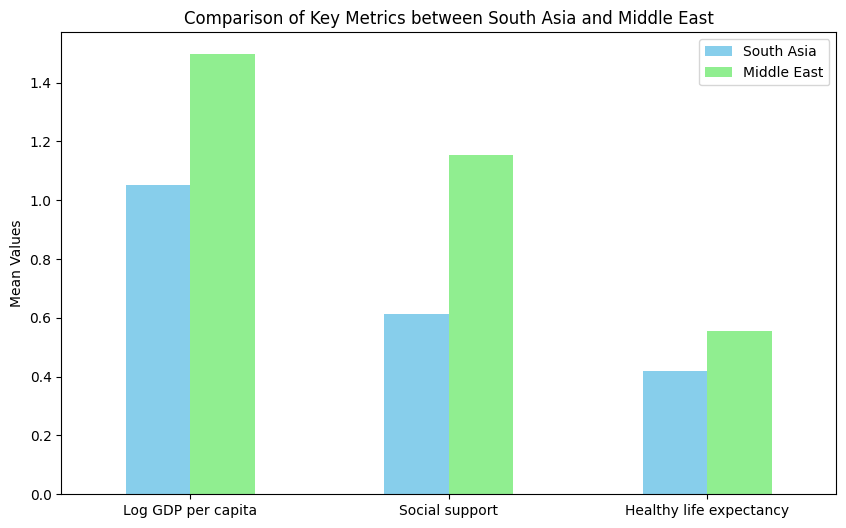

In [ ]:
# 3. Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
sa_metrics = south_asia_df[metrics].mean()
me_metrics = middle_east_df[metrics].mean()

comparison_df = pd.DataFrame({'South Asia': sa_metrics, 'Middle East': me_metrics})
comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.ylabel('Mean Values')
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [ ]:
# 4. Happiness Disparity
sa_range = south_asia_df['score'].max() - south_asia_df['score'].min()
me_range = middle_east_df['score'].max() - middle_east_df['score'].min()

sa_cv = sa_std_score / sa_mean_score
me_cv = me_std_score / me_mean_score

print(f"South Asia - Range: {sa_range}, Coefficient of Variation: {sa_cv}")
print(f"Middle East - Range: {me_range}, Coefficient of Variation: {me_cv}")

if sa_cv > me_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")

South Asia - Range: 3.4370000000000003, Coefficient of Variation: 0.3021482883337427
Middle East - Range: 4.634, Coefficient of Variation: 0.28938880812119405
South Asia has greater variability in happiness.


South Asia - Correlation (Freedom): 0.8005185224163315, Correlation (Generosity): 0.874512371253192
Middle East - Correlation (Freedom): 0.8632202433827543, Correlation (Generosity): 0.6275236536964182


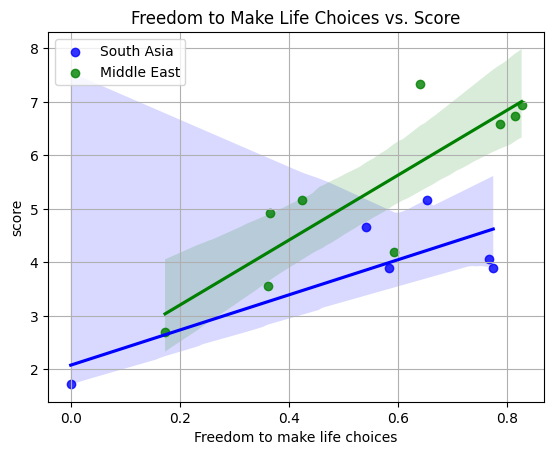

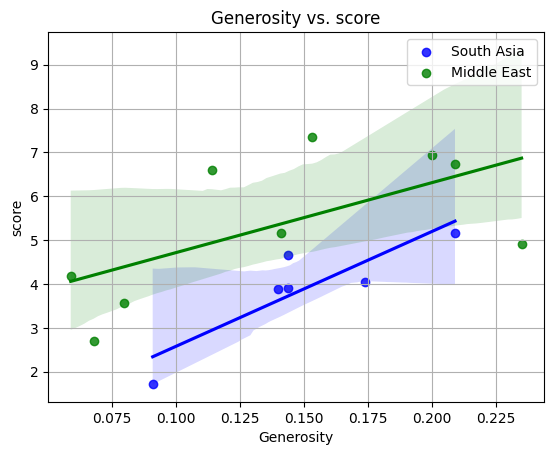

In [ ]:
# 5. Correlation Analysis
sa_corr_freedom = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
me_corr_freedom = middle_east_df['Freedom to make life choices'].corr(middle_east_df['score'])

sa_corr_generosity = south_asia_df['Generosity'].corr(south_asia_df['score'])
me_corr_generosity = middle_east_df['Generosity'].corr(middle_east_df['score'])

print(f"South Asia - Correlation (Freedom): {sa_corr_freedom}, Correlation (Generosity): {sa_corr_generosity}")
print(f"Middle East - Correlation (Freedom): {me_corr_freedom}, Correlation (Generosity): {me_corr_generosity}")

sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, label='South Asia', color='blue')
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_df, label='Middle East', color='green')
plt.title('Freedom to Make Life Choices vs. Score')
plt.legend()
plt.grid(True)
plt.show()

sns.regplot(x='Generosity', y='score', data=south_asia_df, label='South Asia', color='blue')
sns.regplot(x='Generosity', y='score', data=middle_east_df, label='Middle East', color='green')
plt.title('Generosity vs. score')
plt.legend()
plt.grid(True)
plt.show()



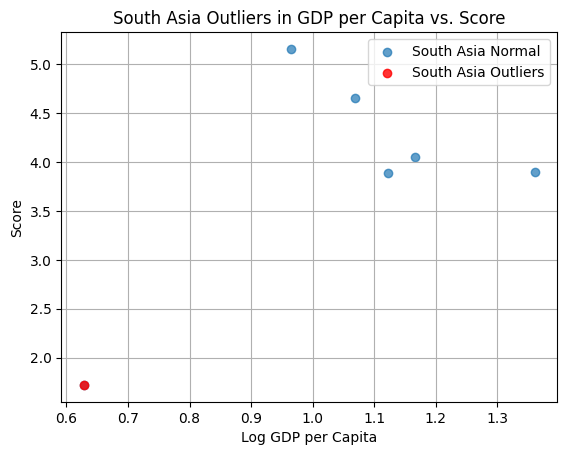

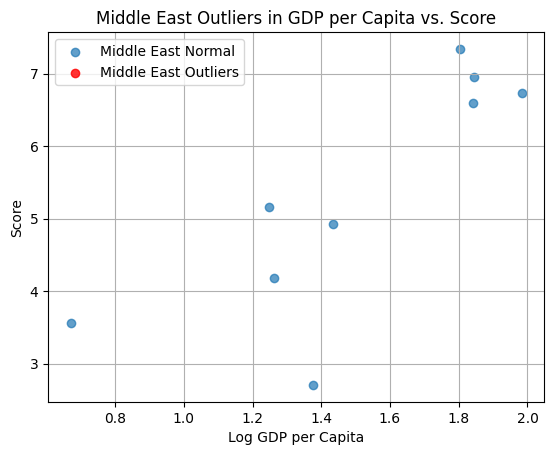

In [ ]:
# 6. Outlier Detection
# Using 1.5*IQR rule for both regions
for region, df in zip(['South Asia', 'Middle East'], [south_asia_df, middle_east_df]):
    Q1 = df[['score', 'Log GDP per capita']].quantile(0.25)
    Q3 = df[['score', 'Log GDP per capita']].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[
        (df['score'] < (Q1['score'] - 1.5 * IQR['score'])) |
        (df['score'] > (Q3['score'] + 1.5 * IQR['score'])) |
        (df['Log GDP per capita'] < (Q1['Log GDP per capita'] - 1.5 * IQR['Log GDP per capita'])) |
        (df['Log GDP per capita'] > (Q3['Log GDP per capita'] + 1.5 * IQR['Log GDP per capita']))
    ]

    plt.scatter(df['Log GDP per capita'], df['score'], label=f'{region} Normal', alpha=0.7)
    plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label=f'{region} Outliers', alpha=0.8)
    plt.title(f'{region} Outliers in GDP per Capita vs. Score')
    plt.xlabel('Log GDP per Capita')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

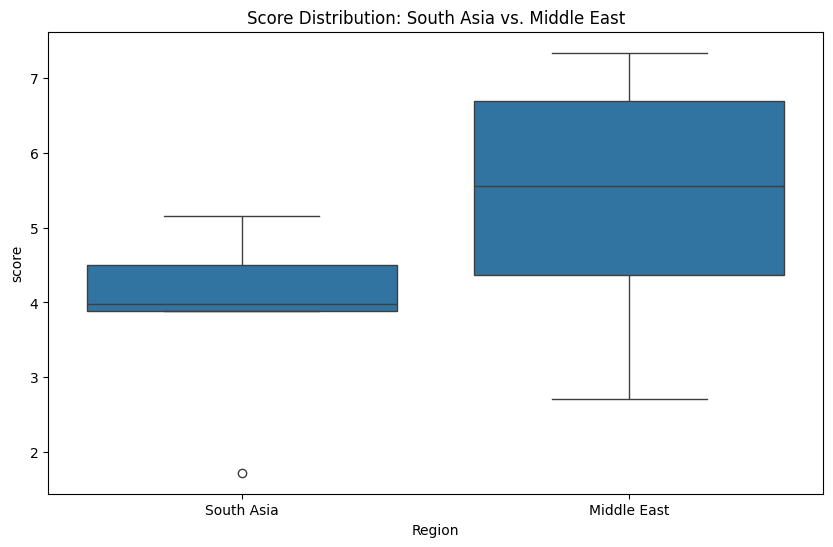

In [ ]:
# Task 7: Boxplots for Score Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([
    south_asia_df.assign(Region='South Asia'),
    middle_east_df.assign(Region='Middle East')
]))
plt.title('Score Distribution: South Asia vs. Middle East')
plt.show()

 Interpret the key differences in distribution shapes, medians, and outliers

Key Differences:

Distribution Shapes:
South Asia has a narrower range of scores compared to the Middle East, as its happiness scores are generally lower.

Median:
The Middle East has a higher median happiness score than South Asia.

Outliers:
South Asia has one outlier, Afghanistan, with an exceptionally low score, while the Middle East has no outliers.